In [ ]:
from deap import benchmarks, base, creator, tools, algorithms
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import array
import random

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


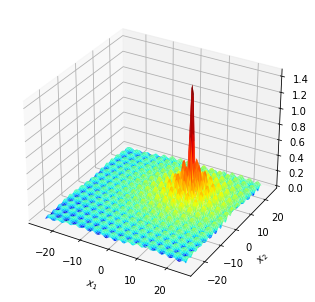

In [ ]:
# Capitulo3_Figura3_1.py

def h1_arg0(sol):
    return benchmarks.h1(sol)[0]

fig = plt.figure()
# ax = Axes3D(fig, azim = -29, elev = 50)
ax = Axes3D(fig)
X = np.arange(-25, 25, 0.5)
Y = np.arange(-25, 25, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(h1_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
 
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")

plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


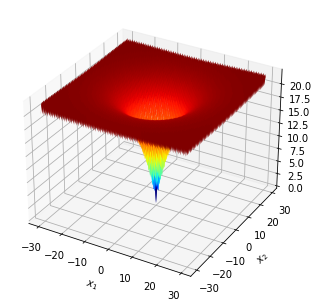

In [ ]:
# Capitulo3_Figura3_2.py 

def ackley_arg0(sol):
    return benchmarks.ackley(sol)[0]

fig = plt.figure()
# ax = Axes3D(fig, azim = -29, elev = 50)
ax = Axes3D(fig)
X = np.arange(-30, 30, 0.5)
Y = np.arange(-30, 30, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(ackley_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2)
 
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

In [ ]:
def crea_individuo(min_, max_, size):
    individuo = [random.uniform(min_, max_) for _ in range(size)]
    return individuo


def mutTriangular(individuo, m, indpb):
    for i in range(len(individuo)):
        if random.random() <= indpb:
            individuo[i] = random.triangular(individuo[i]-m, individuo[i], individuo[i]+m)
    return individuo,


def config(target, min_, max_, size, func, select, tourn_size=None):
    creator.create("FitnessObject", base.Fitness, weights=(target,))
    creator.create("Individual", array.array, typecode = 'f', fitness=creator.FitnessObject)

    toolbox.register("attr", crea_individuo, min_=min_, max_=max_, size=size)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", func)
    # toolbox.register("mate", tools.cxTwoPoint)
    # toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta = 2, low = min_, up = max_)
    toolbox.register("mutate", mutTriangular, m=5, indpb=0.08)

    if tourn_size:
        toolbox.register("select", select, tournsize=tourn_size)
    else:
        toolbox.register("select", select)

In [ ]:
def plot_evolucion(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"])
    # ax1.set_ylim([0, 2.2])
    plt.grid(True)

In [ ]:
def main(CXPB, MUTPB, INDIVIDUOS, NGEN):
    pop = toolbox.population(INDIVIDUOS)

    hof = tools.HallOfFame(1) # guardamos el mejor individuo
    log = tools.Logbook()

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, log = algorithms.eaSimple(pop,toolbox, CXPB, MUTPB, NGEN, halloffame=hof, stats=stats, verbose=False)    
    
    return hof, log

(1.9987299885882805,) Individual('f', [8.69982624053955, 6.767134666442871, 11.99689769744873, 28.297821044921875, 64.37612915039062, -41.200687408447266, -70.47532653808594, 62.962181091308594])
(0.003836824314428,) Individual('f', [-0.00010329460928915069, -0.0009078134316951036, 0.0007987291319295764, 0.0011311781127005816, -0.00011633504618657753, 0.0007333045359700918, -0.00123035185970366, -0.0015365679282695055])
(217.68953665998924,) Individual('f', [421.5464172363281, 420.8810119628906, 421.2292175292969, 421.2638244628906, 421.1789855957031, 420.5975036621094, 420.70159912109375, 421.5265197753906, 420.6493225097656, 421.15167236328125, 421.2986145019531, 420.9118347167969, 421.1325988769531, 421.5157165527344, 420.3787536621094, 421.33428955078125, 420.6886291503906, 420.743408203125, 420.8200988769531, 421.33319091796875, 420.167724609375, 421.0752868652344, 421.0876159667969, 203.80162048339844, 420.9646301269531, 421.3732604980469, 420.99639892578125, 420.8800354003906, 4

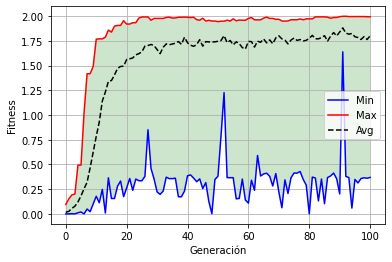

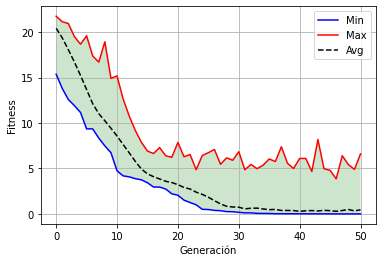

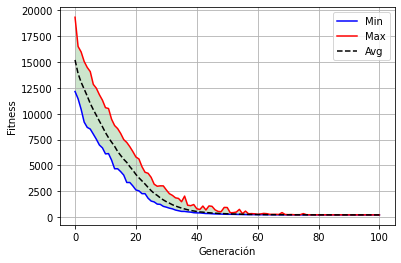

In [ ]:
# funcs = benchmarks.h1, benchmarks.ackley, benchmarks.schwefel
args_main = [
    (0.7, 0.3, 100, 100),
    (0.7, 0.3, 200, 50),
    (0.7, 0.3, 300, 100)
]
params = [
    (1.0, -100, 100, 8, benchmarks.h1, tools.selRoulette),
    (-1.0, -15, 30, 8, benchmarks.ackley, tools.selTournament, 4),
    (-1.0, 0, 500, 40, benchmarks.schwefel, tools.selTournament, 4)
]

for args in zip(params, args_main):
    random.seed(1)
    toolbox = base.Toolbox()

    config(*args[0])
    best, log = main(*args[1])

    print(best[0].fitness.values, best[0])

    plot_evolucion(log)

# Otras pruebas

![Picture title](image-20220303-002434.png)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>